# Titanic Data Analysis

# Introduction

This data analysis will analyze titanic passengers data set and correlation between variables and passenger survival status.
Several questions will be answered in this report to find out what type of passenger is more likely to survive.

Q1: Are female passengers more likely to survive?

Q2: Are passengers in the first class more likely to survive?

Q3: Does embarked location matter?

Q4: Does the number of family member correlated to survival rate?

Q5: Does age matter?

Q6: Does passenger spend a lot on Titanic have a higher survival rate?

By aswering these six question above, we can understand passeger are more likely to survive if they fall into some specifc catogories.

In [66]:
# Read the raw data
import numpy as np
import pandas as pd
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
#change data type
#Reason: the number of sibling and spouse,the number of parent and childring and PassengerId are more catergocical than numeric.
titanic_data.SibSp = titanic_data.SibSp.apply(str)
titanic_data.Parch = titanic_data.Parch.apply(str)
titanic_data.PassengerId = titanic_data.PassengerId.apply(str)

#change the catergocircal data name
#titanic_data['Survived'].replace({0:'Died', 1:'Survived'}, inplace=True)
titanic_data['Embarked'].replace({'C':'Cherbourg', 'Q':' Queenstown', 'S':'Southampton' }, inplace=True)
titanic_data['Pclass'].replace({1:'1st', 2:'2nd', 3:'3rd' }, inplace=True)

In [69]:
#read the head of titanic data again
#titanic_data.head()

In [70]:
#Check the missing value (there are 891 passengerId)
#Any variable with value less than 891 has missing value
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

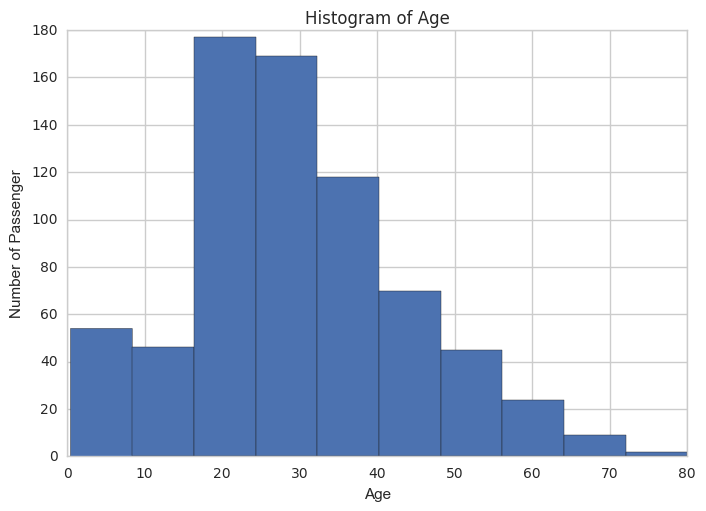

In [71]:
#'Age'distribution before imputation of missing value
import matplotlib.pyplot as plt
import pylab
A = titanic_data['Age']
plt.ylabel('Number of Passenger')
plt.xlabel('Age')
plt.title('Histogram of Age')
plt.hist(A[~np.isnan(A)])
pylab.show()

In [72]:
#I decided to replace the missing value 
#using the mean of age group by Pclass and Sex
#Assume: people in same class and same gender 
#follow the normal distribution in that catogery
print "Age mean values of age group by Age and Sex:"
print titanic_data.groupby(['Sex','Pclass'], as_index=False).mean().loc[:, ['Sex','Pclass', 'Age']]
#apply transformation: Age missing values are filled with regard to Pclass and Sex:
titanic_data.loc[:, 'Age'] = titanic_data.groupby(['Sex','Pclass']).transform(lambda x: x.fillna(x.mean()))

Age mean values of age group by Age and Sex:
      Sex Pclass        Age
0  female    1st  34.611765
1  female    2nd  28.722973
2  female    3rd  21.750000
3    male    1st  41.281386
4    male    2nd  30.740707
5    male    3rd  26.507589


In [73]:
#check whether the missing value is replaced
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

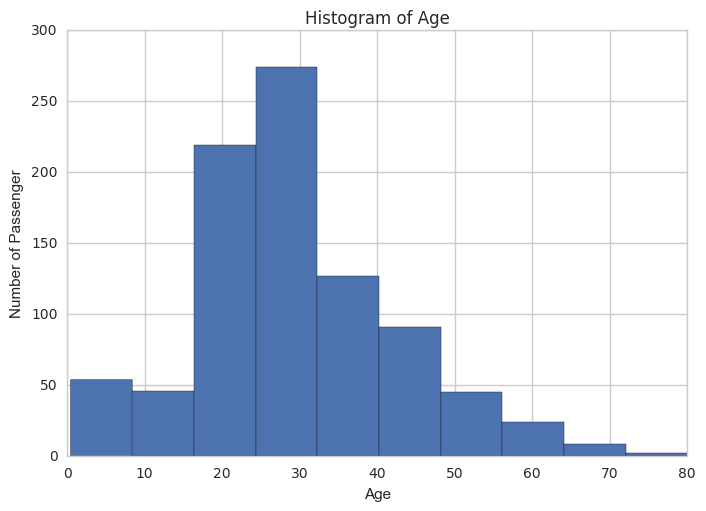

In [74]:
#'Age'distribution after imputation of missing value
import matplotlib.pyplot as plt
import pylab
A = titanic_data['Age']
plt.ylabel('Number of Passenger')
plt.xlabel('Age')
plt.title('Histogram of Age')
plt.hist(A[~np.isnan(A)])
pylab.show()

# Visualization of Each Catergorical Variables

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

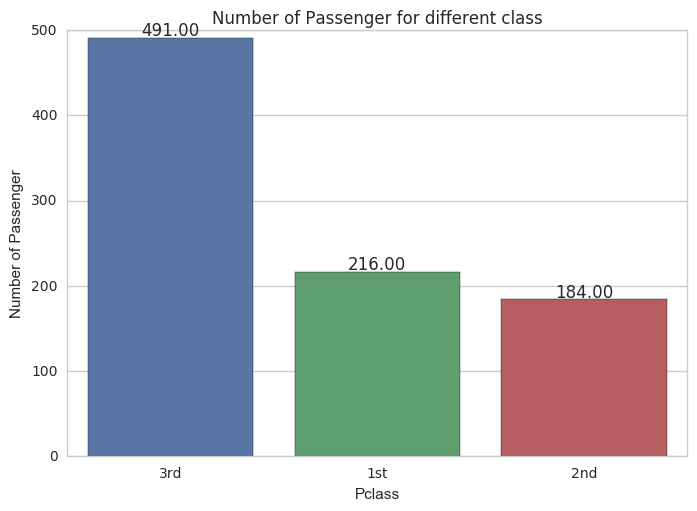

In [76]:
#Plot Number of Passenger in each Class
ax = sns.countplot(x="Pclass", data=titanic_data) 

plt.title('Number of Passenger for different class')
plt.ylabel("Number of Passenger")

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


The number of passenger in the third class is the most and is twice as many as the first and second class, which make sense to the room and ticket planning for a typical cruise.

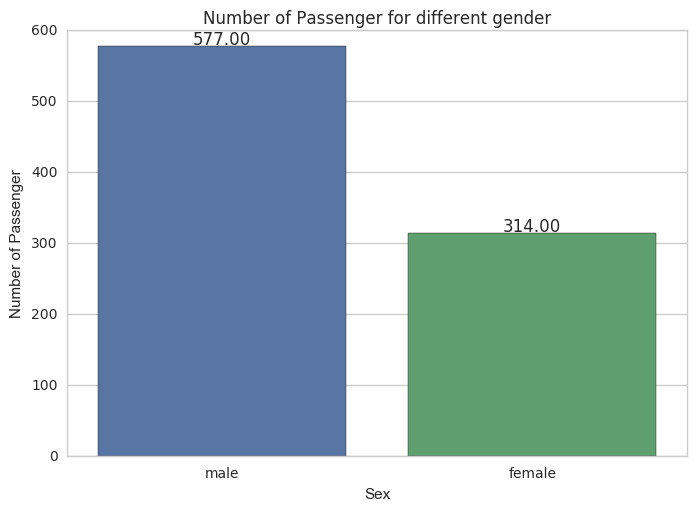

In [18]:
#Plot Number of Passenger in each Gender

ax = sns.countplot(x="Sex", data=titanic_data) 

plt.title('Number of Passenger for different gender')
plt.ylabel("Number of Passenger")

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


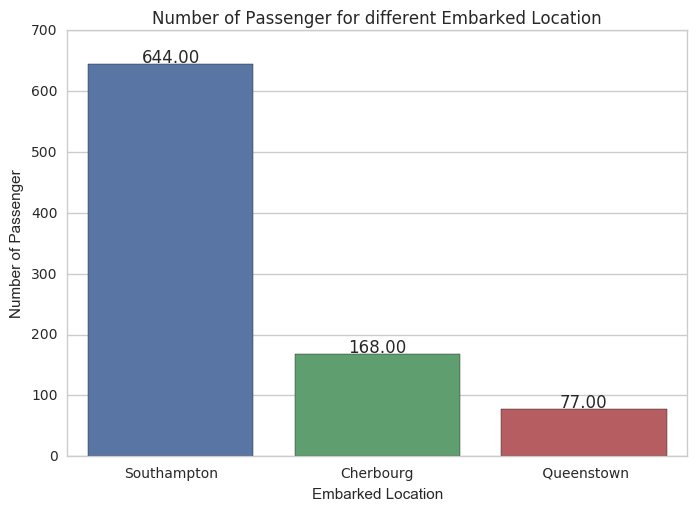

In [77]:
#Plot Number of Passenger for different Embarked Location
ax = sns.countplot(x="Embarked",data=titanic_data) 

plt.title('Number of Passenger for different Embarked Location')
plt.ylabel("Number of Passenger")
plt.xlabel("Embarked Location")

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


One interesting fact is 80% of the passenger are embarked on Southampton.

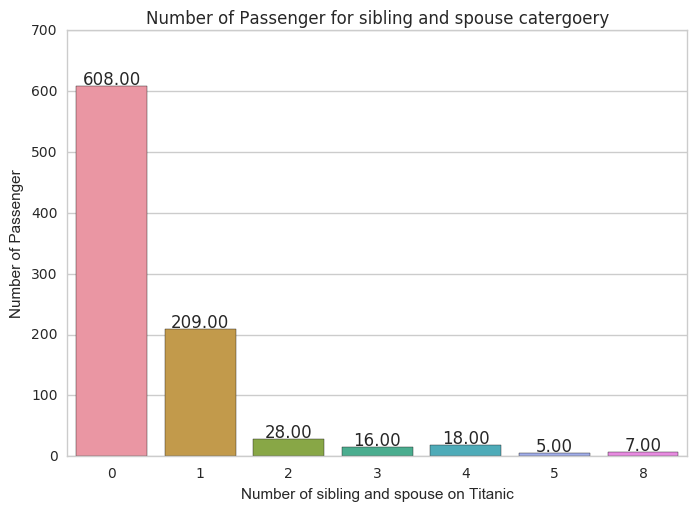

In [81]:
ax = sns.countplot(x="SibSp", data=titanic_data) 

plt.title('Number of Passenger for sibling and spouse catergoery')
plt.ylabel("Number of Passenger")
plt.xlabel("Number of sibling and spouse on Titanic")

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

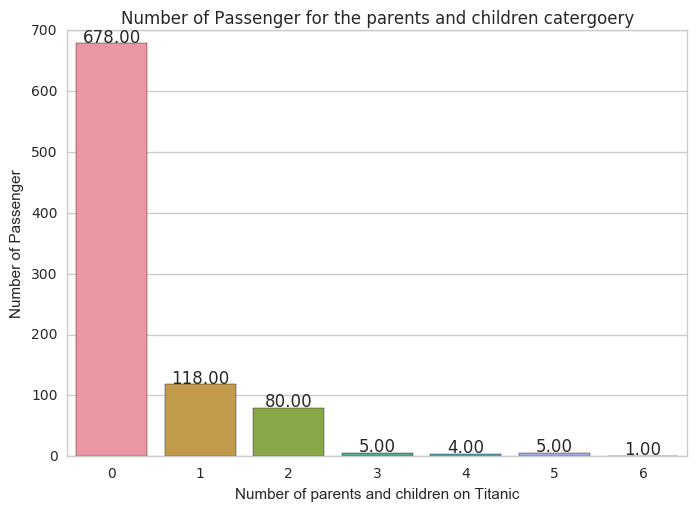

In [80]:
ax = sns.countplot(x="Parch", data=titanic_data) 

plt.title('Number of Passenger for the parents and children catergoery')
plt.ylabel("Number of Passenger")
plt.xlabel("Number of parents and children on Titanic")


for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

The Parch and SibSp variables are highly skewed and the majority of value are 0, so if I plan to run regression on these variables, i will use log10(x+1) to transform the data.

# Distribution of Each Numeric Variables

The following visualization is going to present distribution of numeric varibles, 'age' and 'fare', which will help me to better understanding the population charateristics.

In [83]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

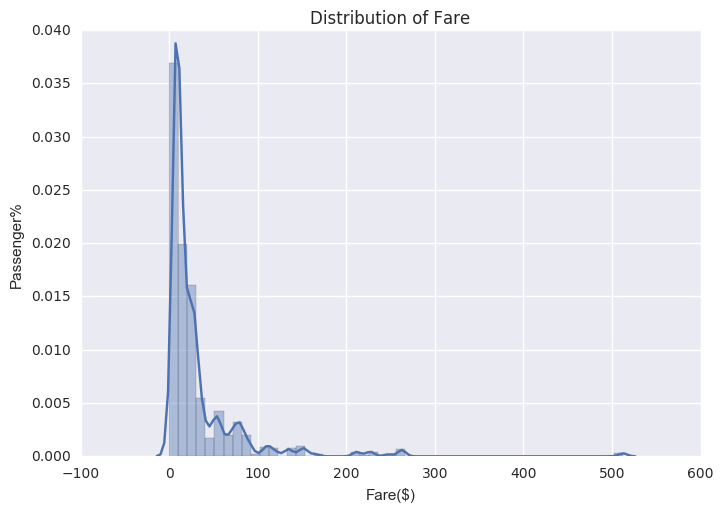

In [84]:
#plot fare distribution
x = titanic_data['Fare'].values
plt.title('Distribution of Fare')
plt.ylabel("Passenger%")
plt.xlabel("Fare($)")
sns.distplot(x)

Fare's distribution is highly skewed, which may need log10(x+1) data transformation in the further analysis

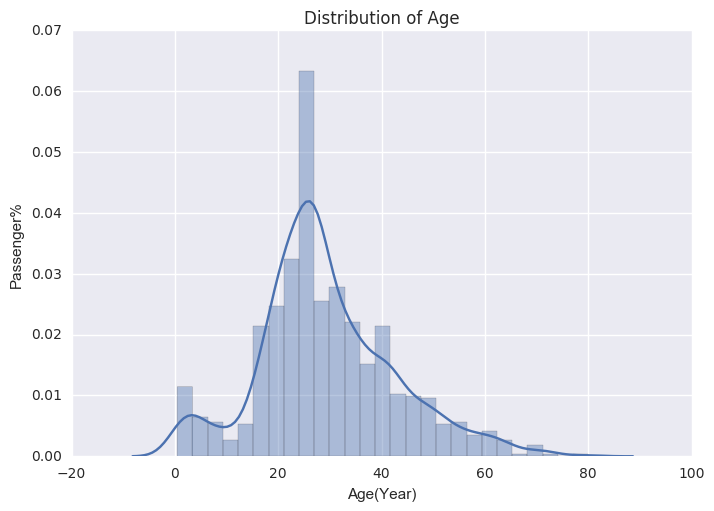

In [18]:
x = titanic_data['Age'].values
plt.title('Distribution of Age')
plt.ylabel("Passenger%")
plt.xlabel("Age(Year)")
sns.distplot(x)

The distribution of Age is normal distribution. But this plot is not the raw data set, because I replaced the missing value by grouped mean.

# Correlation between survival status and variables

In [85]:
#Correlation between survival status and numeric variables
titanic_data.describe()
titanic_data.corr()

,Survived,Age,Fare
Survived,1.000000,-0.067485,0.257307
Age,-0.067485,1.000000,0.118308
Fare,0.257307,0.118308,1.000000


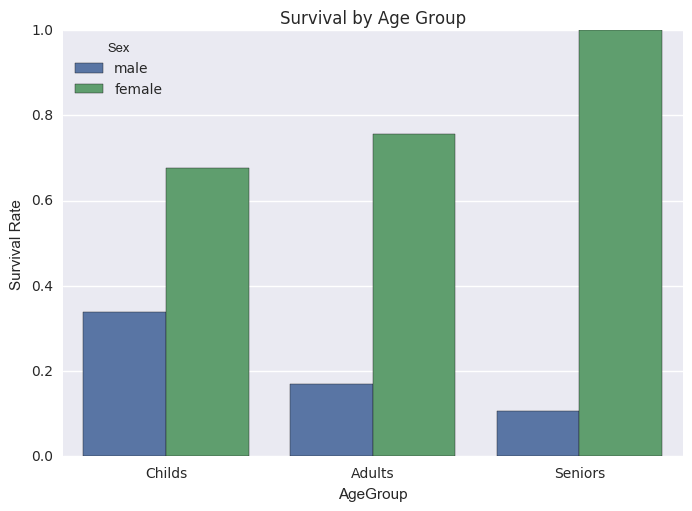

In [86]:
#Since I am interested in finding out whether old people and kid's survival rate are lower than adult to answer Q5
#Whether the pattern is consistant cross gender?
#I plot the survival rate among people in three catergorical group 'Childs'(0-18),'Adults'(18-60),'Seniors'(60,90) 
# and group by gender
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0,18,60,90], labels=['Childs','Adults','Seniors'])
sns.barplot(x="AgeGroup", y="Survived", hue='Sex',data=titanic_data,ci=None)
plt.ylabel("Survival Rate")
plt.title('Survival by Age Group')

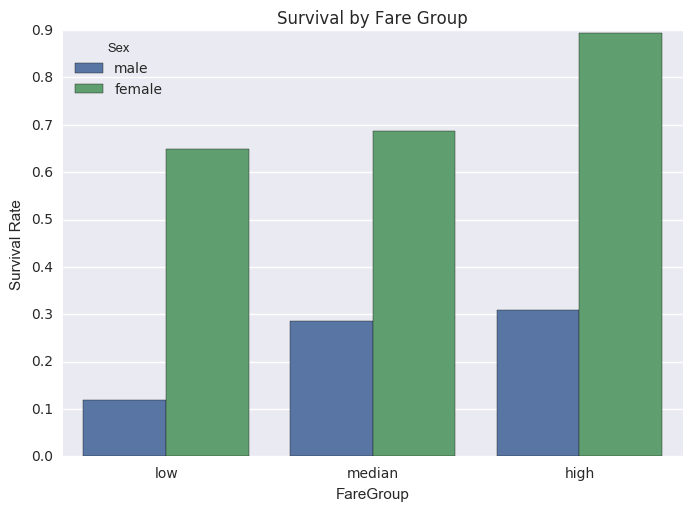

In [97]:
#Since I am also interested in finding out whether people spend a lot on titanic are more likely to live in the first class to answer Q6
#I plot the survival rate among people in three catergorical group 'low'($0,$15),'median'($15,$32),'high'($32, $550)
titanic_data['FareGroup'] = pd.cut(titanic_data['Fare'], bins=[0,15,32,550], labels=['low','median','high'])
sns.barplot(x="FareGroup", y="Survived", hue='Sex', data=titanic_data,ci=None)
plt.ylabel("Survival Rate")
plt.title('Survival by Fare Group')

In [98]:
#To answer "Q1: Are female passengers more likely to survive?"
#I calculated the mean of survival rate for both male and female group
titanic_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [89]:
#To answer Q2: Are passengers in the first class more likely to survive?
#I calculated the mean of survival rate for those three class
titanic_data.groupby('Pclass')['Survived'].mean()

Pclass
1st    0.629630
2nd    0.472826
3rd    0.242363
Name: Survived, dtype: float64

In [90]:
#To answer "Q3: Does embarked location matter?"
#I calculated the mean of survival rate for those three location, Queenstown,Cherbourg and Southampton
titanic_data.groupby('Embarked')['Survived'].mean()

Embarked
 Queenstown    0.389610
Cherbourg      0.553571
Southampton    0.336957
Name: Survived, dtype: float64

It is obvious that passengers from Cherbourg has much higher survival rate. Then I am thinking about whether it is because these passengers are more highly survival rate women or they are rich who live in the first class

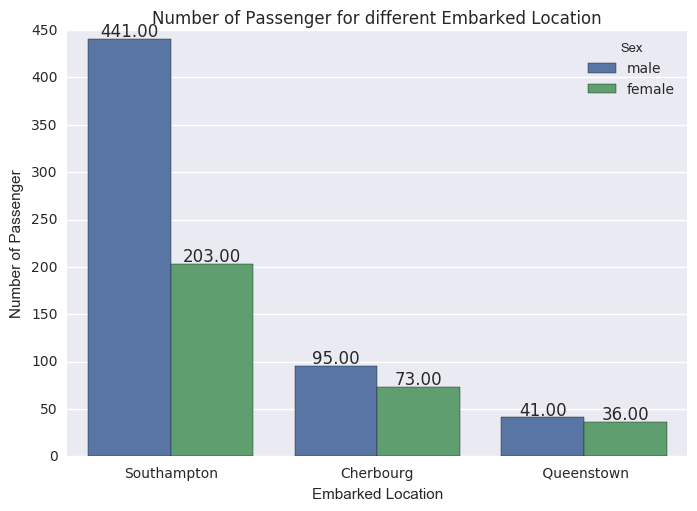

In [91]:
# I invetigated the  male/female passenger proportion among all these three location
ax = sns.countplot(x="Embarked",hue="Sex",data=titanic_data) 

plt.title('Number of Passenger for different Embarked Location')
plt.ylabel("Number of Passenger")
plt.xlabel("Embarked Location")

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


There is not a high proportion of woman passenger embarked in Cherbourg. However, there is a 2:1 proportion on male to female on passengers embarked in Southampton. Since the total average male passengers is so low 19%, this may explain wht the survival rate in Southampton is the lowest. However, if the male survival rate in Southampton is higher than avaerage survival rate, then that might not be the case. Therefore, I am going to investigate the survival rate group by gender and embarked location.
From the chart below, we can see that male passenger form Southampton has a median survival rate. Therefore, it is very likely that hypothesis is true.


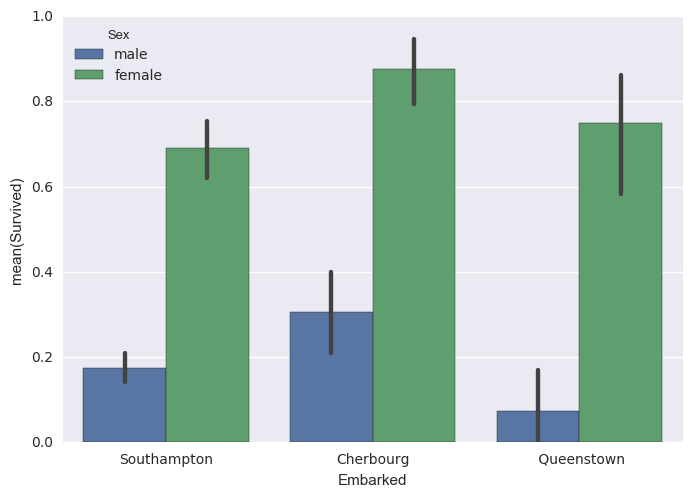

In [92]:
# survival rate group by embarked location and sex
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_data);

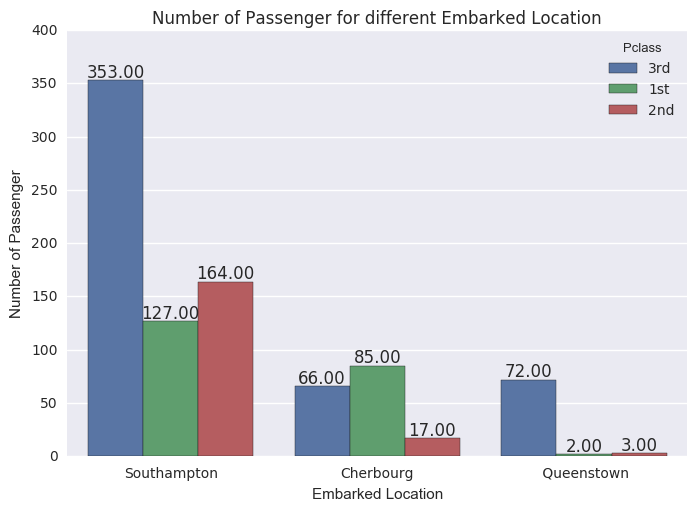

In [93]:
# I invetigated the  male/female passenger proportion among all these three location
ax = sns.countplot(x="Embarked",hue="Pclass",data=titanic_data) 

plt.title('Number of Passenger for different Embarked Location')
plt.ylabel("Number of Passenger")
plt.xlabel("Embarked Location")

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


It is obvious the proportion of 1st class passengers embarked in Cherbourg far more higher than the other two embarked location

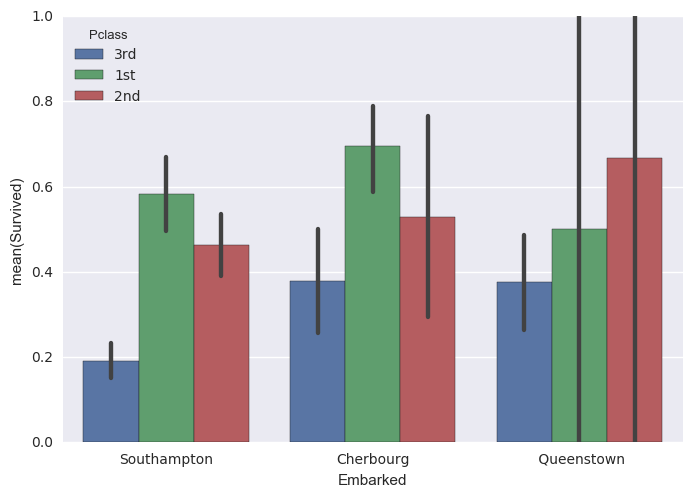

In [94]:
# survival rate group by embarked location and class
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=titanic_data);

Since the survival rate of first class embarked in Cherbourg is also the highest among three, it is possible the high proportion of rich passenger contributed to the high survival rate in CHerbourg Emabrked group.
A reasonable guess will be, the low male proportion, high class proportion, and a averge group survival rate, contributed to the final 55% survival rate, compared to around 30%

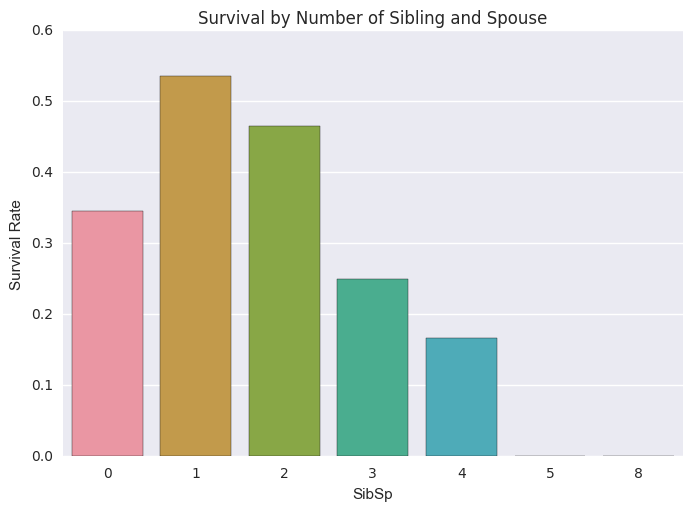

In [95]:
#To answer "Q4: Does the number of family member correlated to survival rate?"
#I calculated the mean of survival rate for those passenger has 0 to 8 siblings or/and spouses
titanic_data.groupby('SibSp')['Survived'].mean()
sns.barplot(x='SibSp', y="Survived",data=titanic_data,ci=None)
plt.ylabel("Survival Rate")
plt.title('Survival by Number of Sibling and Spouse')

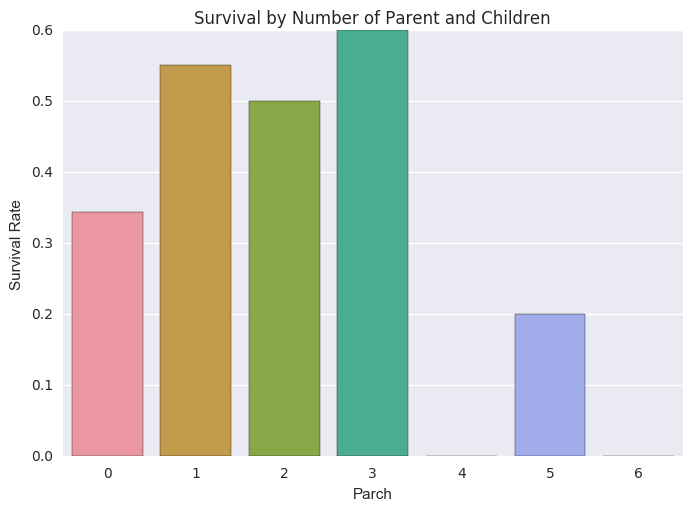

In [96]:
#To answer "Q4: Does the number of family member correlated to survival rate?"
#I calculated the mean of survival rate for those passenger has 0 to 6 children
titanic_data.groupby('Parch')['Survived'].mean()
sns.barplot(x='Parch', y="Survived",data=titanic_data,ci=None)
plt.ylabel("Survival Rate")
plt.title('Survival by Number of Parent and Children')

# Summary


To answer my questions raised at the beginning of this analysis
Q1: Are female passengers more likely to survive?

Yes. Becuase the female survival rate is 74%, while male is 18.9%
female    0.742038
male      0.188908

Q2: Are passengers in the first class more likely to survive?

Yes. The 1st class passengers' survival rate is 63%; the 2nd is 47%, and the 3rd is 24%
1st    0.629630
2nd    0.472826
3rd    0.242363

Q3: Does embarked location matter?
Yes. People embarked in Cherbourg are more likely to survive, a 55% survival rate, compared the other two embarked locations.
Embarked
Queenstown    0.389610
Cherbourg      0.553571
Southampton    0.336957

Q4: Does the number of family member correlated to survival rate?
Passengers have less sibling or spouse are more likely to survive. And If a passenger has less than three kids, he or she is more likely to survive than those who have more than 3.

Q5: Does age matter?
Yes. In general, kids are the group that most likely to survive and senior is the least. However, within female passengers, senior passengers are the highest, and the kid passengers are the lowest.

Q6: Does passenger spend a lot on Titanic have a higher survival rate?
Yes. Especially female passenger who spent a lot on Titanic has a 90% survival rate


The limitations of the dataset and this analysis
This raw data set only contain ten variables. However, other variables like health status, occupation, whether the passenger knows how to swim, etc. are also necessary to consider when analysis the passenger's survival rate. If I had those data, I would calculate the correlation between the health status and the survival rate to see whether people who are healthier and stronger are more likely to survive. Also, I would see the distribution of survival rate in categories individuals who can swim and individuals who don't.

This raw data didn't tell us the source of this data and the time that collected. If all these data are collected before Titanic, the data has more value and less bias. However, if some variables data are provided by people who survived after Titanic, it may exist survivor bias in the data set.

I used the Pearson correlation statistical testing on numeric variables and survival rate. Spearman rank correlation may be a better solution. I used the Chi-Square Test (followed after this summary) for Independence to analysis the relationship between categorical variables in this analysis.(Pearson's chi-squared test)

Also, I replace the missing value in 'Age' variable with the mean group by gender and class. It may lead some distortion into the afterward analysis.

To sum-up, an adult female in first class, embarked in Cherbourg, with one kid might have the biggest survival rate during the Titanic. But further analysis is needed to present more detailed probability.

In [58]:
#Chi Square Test for Sex and Survived
# From before:
cont_df = titanic_data[['PassengerId','Survived','Sex']].copy()

# observed
grouped = cont_df.groupby(['Survived','Sex']).count().unstack('Survived')
grouped.columns = ['Perished','Survived']

# Add
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(grouped)

# p-value
p

1.1973570627755645e-58

The p-value is < 0.05, means the survival rate are statistically significant correlated. 

In [62]:
#Chi Square Test for Class and Survived
# From before:
cont_df = titanic_data[['PassengerId','Survived','Pclass']].copy()

# observed
grouped = cont_df.groupby(['Survived','Pclass']).count().unstack('Survived')
grouped.columns = ['Perished','Survived']

# Add
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(grouped)

# p-value
p

4.5492517112987927e-23

In [63]:
#Chi Square Test for Embarked Location and Survived
# From before:
cont_df = titanic_data[['PassengerId','Survived','Embarked']].copy()

# observed
grouped = cont_df.groupby(['Survived','Embarked']).count().unstack('Survived')
grouped.columns = ['Perished','Survived']

# Add
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(grouped)

# p-value
p

1.769922284120912e-06

In [ ]:
All three categorical variables are statistically significant correlated to Survival rate